In [1]:
# imports
from Helpers.Mantels_Helpers import extract_all_files, create_tasks_for_parrelization, get_embeddings, mantel_test

2025-02-06 21:37:12.857394: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Mantel's correlation Tests
 
- Brought to by the one and only Adam and the one and only Marshall

In [2]:
# Test extract all files
df = extract_all_files()
df.sample(5) 

,method,csv_file,split,Percent_of_Anchors,Best_Params,CE,FOSCTTM,Random Forest OOB,Random Forest Emb,Nearest Neighbor,...,Nearest Neighbor B,Nearest Neighbor (F1 score or RMSE) A,Nearest Neighbor (F1 score or RMSE) B,Random Forest (F1 score or RMSE) A,Random Forest (F1 score or RMSE) B,dataset,r_obs,lam,p_value,five_point_summary
3160,SPUD,balance_scale,skewed,0.3,"{'knn': 2, 'OD_method': 'default', 'agg_method...",{'42': 0.6784},{'42': 0.00749568},{'42': 0.679},NaN,NaN,...,{'42': 0.68},{'42': 0.5840169635284139},{'42': 0.6489538807649043},{'42': 0.5826398783844857},{'42': 0.6903496503496503},NaN,NaN,NaN,NaN,NaN
1623,SSMA,heart_failure,turn,0.3,"{'knn': 26, 'Uincluded': True, 'Dincluded': True}","{'42': 0.7809278350515464, '1738': 0.780927835...","{'42': 0.006024816664895313, '1738': 0.0060248...","{'42': 0.9790322580645161, '1738': 0.882258064...",NaN,NaN,...,"{'42': 0.5384615384615384, '1738': 0.641025641...","{'42': 0.39487179487179486, '1738': 0.61605665...","{'42': 0.39487179487179486, '1738': 0.61605665...","{'42': 0.6923076923076923, '1738': 0.602664358...","{'42': 0.6923076923076923, '1738': 0.602664358...",NaN,NaN,NaN,NaN,NaN
5771,MASH,glass,distort,0.3,"{'knn': 7, 'page_rank': 'off-diagonal', 'DTM':...","{'42': 0.6728971962616822, '1738': 0.663551401...","{'42': 0.022480129268931785, '1738': 0.0224801...","{'42': 0.6842105263157895, '1738': 0.652046783...","{'42': 0.6046511627906976, '1738': 0.558139534...","{'42': 0.5697674418604651, '1738': 0.558139534...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2676,SPUD,heart_disease,random,0.3,"{'knn': 20, 'OD_method': 'default', 'agg_metho...","{'42': 0.5185185185185185, '1738': 0.420875420...","{'42': 0.0, '1738': 0.0, '5271': 0.00011336711...","{'42': 0.46835443037974683, '1738': 0.52742616...",NaN,NaN,...,"{'42': 0.6, '1738': 0.36666666666666664, '5271...","{'42': 0.5236363636363637, '1738': 0.220416666...","{'42': 0.4897435897435897, '1738': 0.210833333...","{'42': 0.6246623093681918, '1738': 0.256859202...","{'42': 0.5222895622895624, '1738': 0.236764705...",NaN,NaN,NaN,NaN,NaN
2259,NAMA,CommunityCrime,even,0.3,"{'OD_method': 'absolute_distance', 'agg_method...",{'42': -0.19437194833775417},{'42': 0.0},{'42': 0.05381330020335284},NaN,NaN,...,{'42': 0.001575902263372564},{'42': 0.9380256588569863},{'42': 0.938594973736579},{'42': 0.9637281908696278},{'42': 0.9359105203735396},NaN,NaN,NaN,NaN,NaN


In [3]:
# Test to create tasks
tasks = create_tasks_for_parrelization(df)
tasks[:2]

[('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  0),
 ('SPUD',
  'ComputerHardware',
  'random',
  {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'},
  10)]

In [4]:
#Select the part where its iris data set for ease :)
iris_task = next(task for task in tasks if 'iris' in task[1])
print(iris_task)

('JLMA', 'iris', 'even', {'knn': 2, 'normalized_laplacian': True, 'd': 2, 'mu': 1}, 0)


In [5]:
#Test get embeddings fucntion
partial, pred, full, full_labels, pred_labels = get_embeddings(*iris_task, return_labels=True)

240 300 300


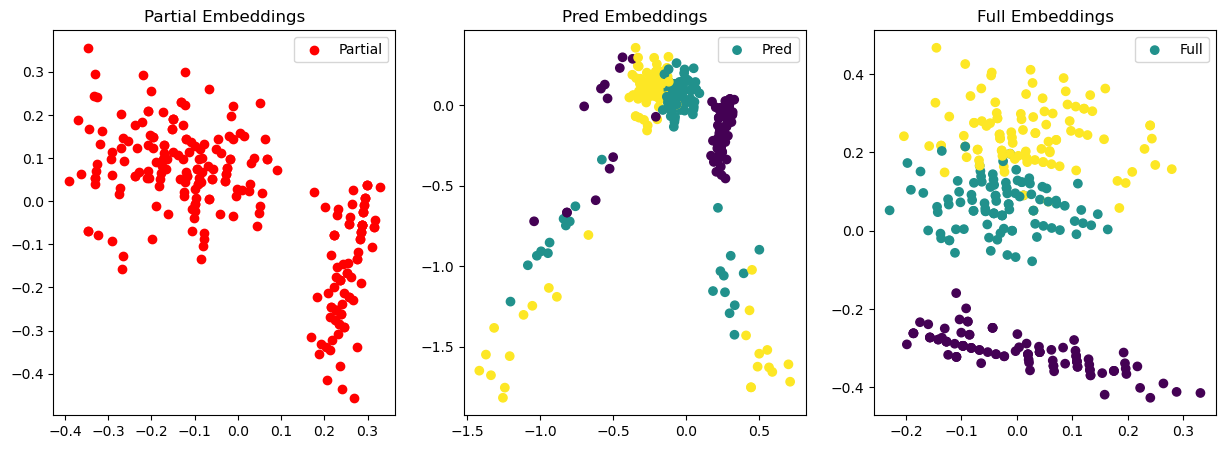

In [6]:
import matplotlib.pyplot as plt

#See if the sizes are correct
print(len(partial), len(pred), len(full))

#Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels, label='Pred')
axes[1].set_title('Pred Embeddings')
axes[1].legend()

axes[2].scatter(full[:, 0], full[:, 1], c=pred_labels, label='Full') #NOTE TO MARTIAL -> YOU WANT TO MAKE SURE THE POINTS AREN'T SHUFFLED
axes[2].set_title('Full Embeddings')
axes[2].legend()

plt.show()

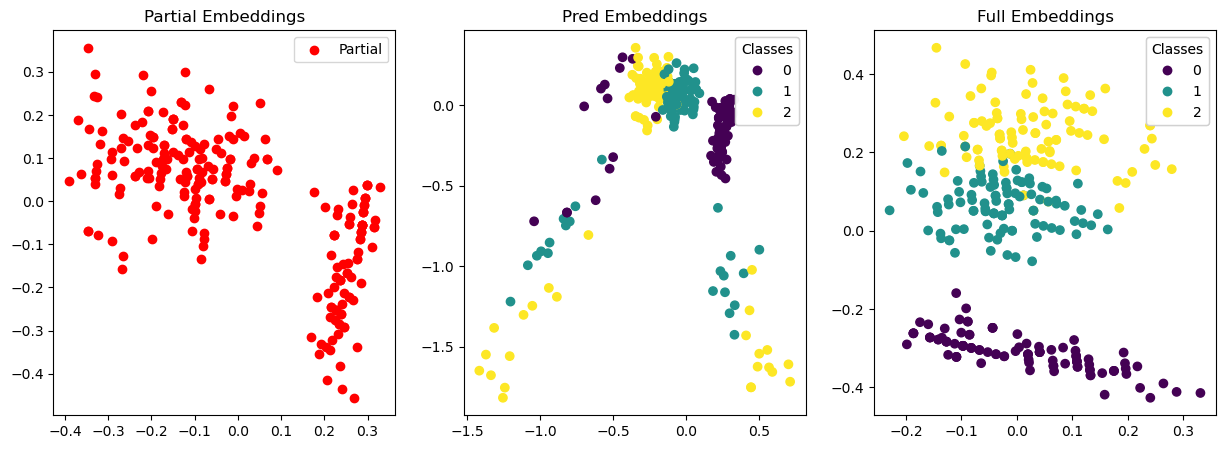

In [7]:
# Plot the embeddings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(partial[:, 0], partial[:, 1], c='r', label='Partial')
axes[0].set_title('Partial Embeddings')
axes[0].legend()

scatter_pred = axes[1].scatter(pred[:, 0], pred[:, 1], c=pred_labels)
axes[1].set_title('Pred Embeddings')
legend_pred = axes[1].legend(*scatter_pred.legend_elements(), title="Classes")
axes[1].add_artist(legend_pred)

scatter_full = axes[2].scatter(full[:, 0], full[:, 1], c=full_labels)
axes[2].set_title('Full Embeddings')
legend_full = axes[2].legend(*scatter_full.legend_elements(), title="Classes")
axes[2].add_artist(legend_full)

plt.show()

('SPUD', 'ComputerHardware', 'random', {'knn': 12, 'OD_method': 'default', 'agg_method': 'log'}, 0)


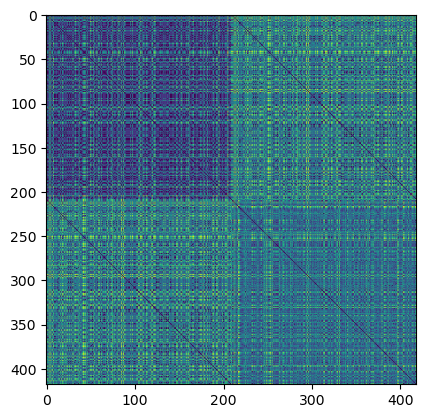

In [8]:
print(tasks[0])
emb_pred, emb_full, block_full = get_embeddings(*tasks[0], return_labels=False)
plt.imshow(block_full)

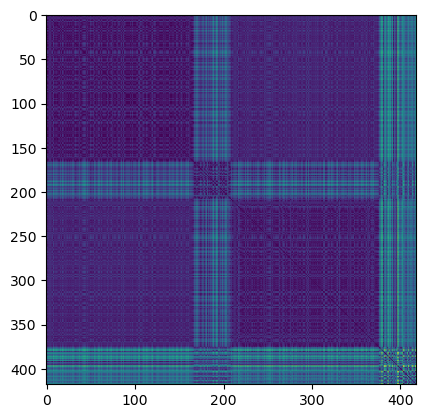

In [9]:
from scipy.spatial.distance import pdist, squareform
plt.imshow(squareform(pdist(emb_pred)))
#plt.imshow(squareform(pdist(emb_full)))

# Marshall's Tests here?

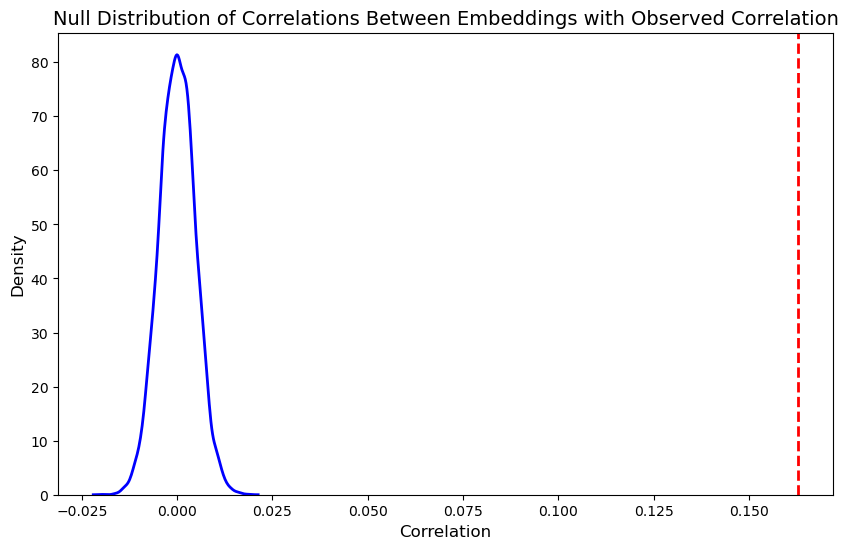

Error saving Mantel results: [Errno 13] Permission denied: '/yunity/arusty/Graph-Manifold-Alignment/Results/Mantel_lam/JLMA_iris_even_lam_0.json'
Mantel results saved to: /yunity/arusty/Graph-Manifold-Alignment/Results/Mantel_lam/JLMA_iris_even_lam_0.json
JLMA iris even {'knn': 2, 'normalized_laplacian': True, 'd': 2, 'mu': 1} 0
0.162756764086442 0.0


In [10]:
r_obs, p_value = mantel_test(*iris_task, plot = True, repeat_results = True)
print(*iris_task)
print(r_obs, p_value)

In [11]:
#Unpack all the code and run the mantel test
for i in range(5):
    task_to_run = tasks[i+14]
    print(task_to_run)
    r_obs, p_value = mantel_test(method = task_to_run[0], dataset=task_to_run[1], split = task_to_run[2], params = task_to_run[3], plot = True)
    print(r_obs, p_value)

('MASH', 'ComputerHardware', 'skewed', {'knn': 12, 'page_rank': 'None', 'DTM': 'kl', 'density_normalization': False, 'connection_limit': 'auto', 'threshold': 'auto', 'epochs': 100}, 1000)
Plotting is disabled for existing files.
nan nan
('MASH', 'ComputerHardware', 'skewed', {'knn': 12, 'page_rank': 'None', 'DTM': 'kl', 'density_normalization': False, 'connection_limit': 'auto', 'threshold': 'auto', 'epochs': 100}, 10000)
Plotting is disabled for existing files.
nan nan
('DTA', 'ComputerHardware', 'distort', {'knn': 17, 'distances': 'DPT'}, 0)
Plotting is disabled for existing files.
nan nan
('DTA', 'ComputerHardware', 'distort', {'knn': 17, 'distances': 'DPT'}, 10)
Plotting is disabled for existing files.
nan nan
('DTA', 'ComputerHardware', 'distort', {'knn': 17, 'distances': 'DPT'}, 1000)
Plotting is disabled for existing files.
nan nan


In [12]:
# Testing parralization loop
#Imports
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

with tqdm_joblib(tqdm(total=5)): #This includ]==s a progress bar :)
    with Parallel(n_jobs=-1) as parallel:
        parallel(
            delayed(mantel_test)(*task)
            for task in tasks[103:108]
        )


ModuleNotFoundError: No module named 'tqdm_joblib'

# Vizualizations

In [13]:
from Helpers.Mantels_Helpers import read_all_mantel_results, plot_averaged_mantel_stats, read_all_mantel_results_lam
from Helpers.Visualization_helpers import subset_df

/yunity/msn39/Graph-Manifold-Alignment/Python_Files/Helpers/Visualization_helpers.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/yunity/arusty/Graph-Manifold-Alignment/Results/All_Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)


In [14]:
mantel_df = read_all_mantel_results_lam()
mantel_df.sample(5)

,method,dataset,split,r_obs,p_value,five_point_summary,lam
4512,MAPA,Medicaldataset,random,0.045413,0.0,"{'min': -0.0013947800384949438, 'Q1': -0.00027...",0
332,MAPA,heart_failure,distort,0.018982,0.0,"{'min': -0.007149716385935469, 'Q1': -0.001227...",0
134,NAMA,diabetes,even,0.705058,0.0,"{'min': -0.0033021358788575456, 'Q1': -0.00062...",100
2837,NAMA,flare1,distort,0.583203,0.0,"{'min': -0.00791344851830619, 'Q1': -0.0015029...",1
2842,MAPA,glass,turn,0.106362,0.0,"{'min': -0.00914050959544465, 'Q1': -0.0017189...",10


In [17]:
mantel_df[["method", "r_obs", "p_value"]].groupby("method").mean()

,r_obs,p_value
method,,
DTA,0.253208,0.005754
JLMA,0.801286,0.005743
MAGAN,0.543158,0.017463
MAPA,0.171625,0.013649
MASH,0.684433,0.004131
MASH-,0.675799,0.005337
NAMA,0.579902,0.009410
SPUD,0.715184,0.005319
SSMA,0.142502,0.036945


<Axes: xlabel='lam'>

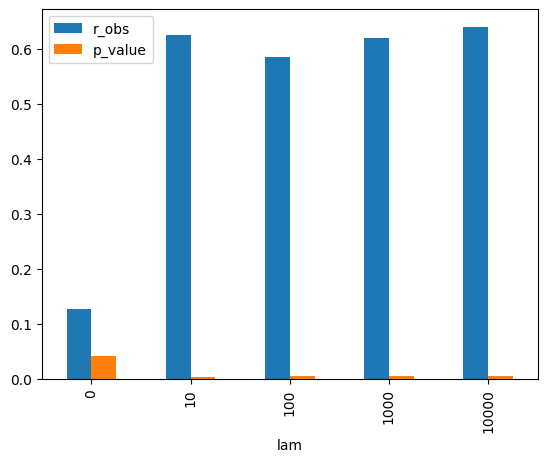

In [9]:
# Group by 'lam' and calculate the mean of 'r_obs' and 'p_value'
mantel_df.drop(columns = ["method", "dataset", "split", "five_point_summary"]).groupby('lam').mean()[['r_obs', 'p_value']].plot(kind = "bar")

<Axes: xlabel='method,lam'>

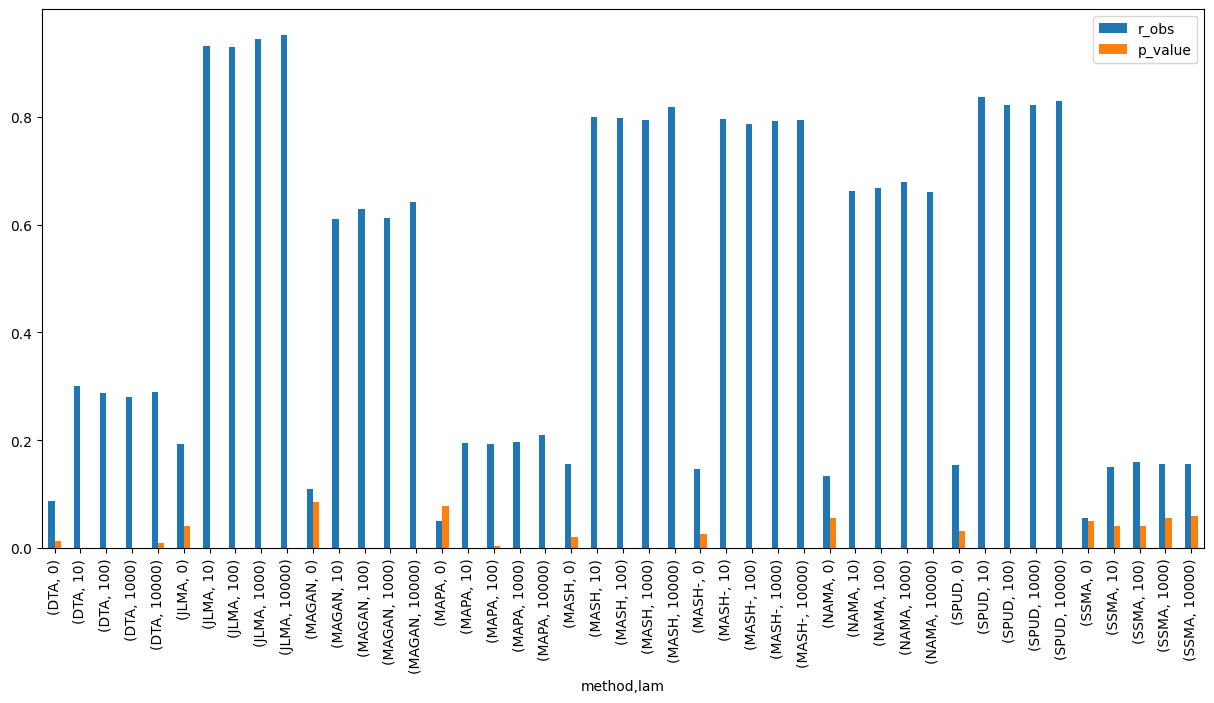

In [15]:
mantel_df.drop(columns =  ["dataset", "split", "five_point_summary"]).groupby(
            ["method", "lam"]).mean()[['r_obs', 'p_value']].plot( #.sort_values(by = "r_obs")
                kind = "bar", figsize = (15, 7))

In [7]:
subset_df(mantel_df, p_value = 1.0)

,method,dataset,split,r_obs,p_value,five_point_summary,lam
139,SSMA,Automobile,skewed,-0.071847,1.0,"{'min': -0.014841955411885193, 'Q1': -0.002403...",100
311,SSMA,ionosphere,skewed,-0.056475,1.0,"{'min': -0.005767799158535288, 'Q1': -0.001034...",100
874,SSMA,EnergyEfficiency,random,-0.046878,1.0,"{'min': -0.002736547535257248, 'Q1': -0.000482...",100
926,SSMA,EnergyEfficiency,even,-0.084066,1.0,"{'min': -0.0024916998995046747, 'Q1': -0.00048...",100
66,MAGAN,Automobile,distort,-0.031155,1.0,"{'min': -0.014755654889307584, 'Q1': -0.002980...",0
159,SSMA,EnergyEfficiency,even,-0.086545,1.0,"{'min': -0.002254169934652289, 'Q1': -0.000490...",10
241,NAMA,hepatitis,skewed,-0.035485,1.0,"{'min': -0.02039897616158193, 'Q1': -0.0034133...",0
400,SSMA,ionosphere,skewed,-0.036081,1.0,"{'min': -0.005942056892429064, 'Q1': -0.001032...",10000
603,MAGAN,ionosphere,skewed,-0.017390,1.0,"{'min': -0.008405274140238396, 'Q1': -0.001366...",0
620,SPUD,ionosphere,even,-0.027837,1.0,"{'min': -0.006963732294657673, 'Q1': -0.001313...",0


In [8]:
len(subset_df(mantel_df, p_value = 0.0))

3432

In [9]:
subset_df(mantel_df, method = "RF-SPUD")["r_obs"].mean()

nan

In [10]:
subset_df(mantel_df, method = "SPUD")["r_obs"].mean()

0.6890883633606966

Mean P-Value: 0.011188526466380543
Minimun P-value: 0.0
Maximum P-value: 1.0


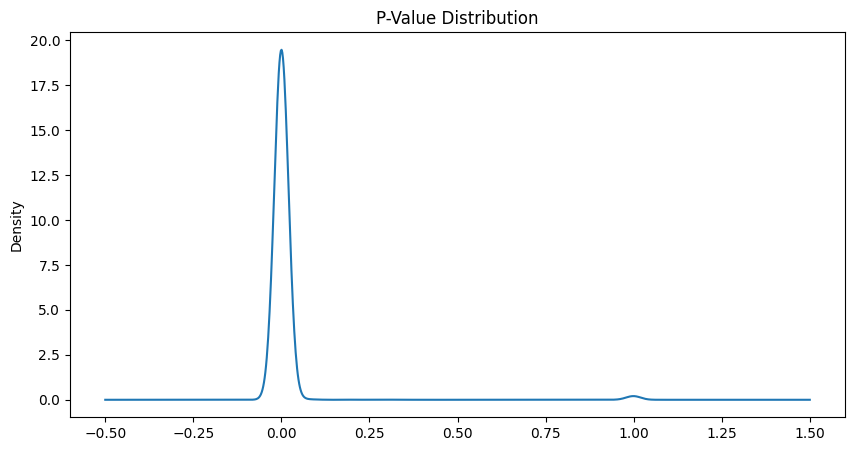

In [11]:
print(f"Mean P-Value: {mantel_df['p_value'].mean()}")
print(f"Minimun P-value: {mantel_df['p_value'].min()}")
print(f"Maximum P-value: {mantel_df['p_value'].max()}")

#The following will error if all the p_values are 0
if mantel_df["p_value"].max() == 0:
    print("All P-Values are 0 -- cannot plot")
else:
    mantel_df["p_value"].plot(kind="kde", title="P-Value Distribution", figsize=(10, 5))

Mean r_obs: 0.5428098010143689
Minimun r_obs: -0.17322293190110744
Maximum r_obs: 0.9999602354625808


<Axes: title={'center': 'r_obs Distribution'}, ylabel='Density'>

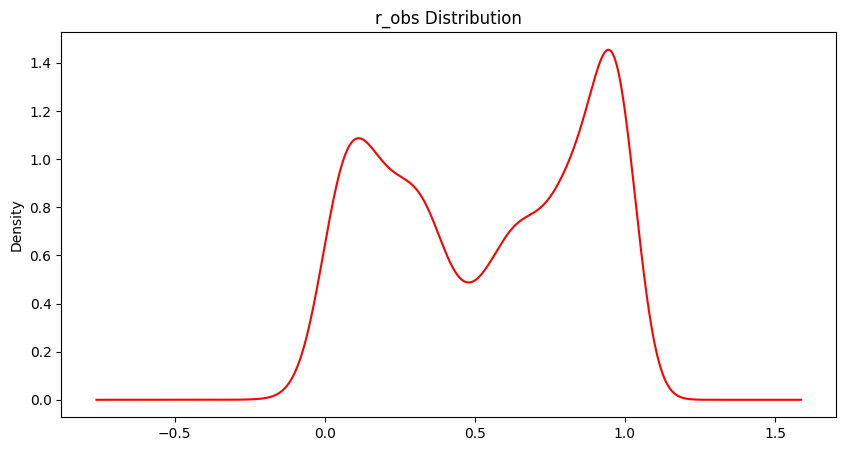

In [12]:
print(f"Mean r_obs: {mantel_df['r_obs'].mean()}")
print(f"Minimun r_obs: {mantel_df['r_obs'].min()}")
print(f"Maximum r_obs: {mantel_df['r_obs'].max()}")
mantel_df["r_obs"].plot(kind="kde", title="r_obs Distribution", figsize=(10, 5), c = "red")

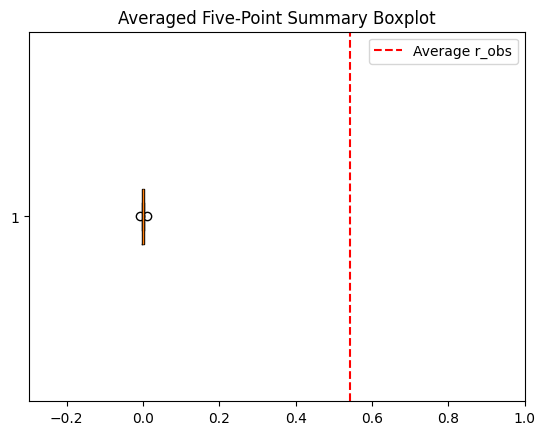

In [13]:
plot_averaged_mantel_stats(mantel_df)